<a href="https://colab.research.google.com/github/shraddha0822/Handwritten-English-Character-Recognition/blob/main/Handwritten_English_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Setting Up Kaggle API Authentication

In [3]:
# Upload the kaggle.json file (Kaggle API Key)

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading Dataset

!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
License(s): CC0-1.0
 97% 180M/185M [00:06<00:00, 36.2MB/s]
100% 185M/185M [00:06<00:00, 29.7MB/s]


In [4]:
# Unzipping Dataset

!unzip az-handwritten-alphabets-in-csv-format.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


### Loading and Exploring Data

In [5]:
df = pd.read_csv('A_Z Handwritten Data.csv')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(372450, 785)

In [7]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


### Preparing Features and Labels

In [8]:
# Split x and y columns from dataset
x = df.drop('0', axis = 1)
y = df['0']

### Splitting Data for Training and Testing

In [9]:
# Reshape the image data to be displayed as an image of 28×28 pixels.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)


### Mapping Labels to Alphabets

In [10]:
# Create word_dict to map the integers with the letters.

word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

### Visualizing Alphabet Distribution

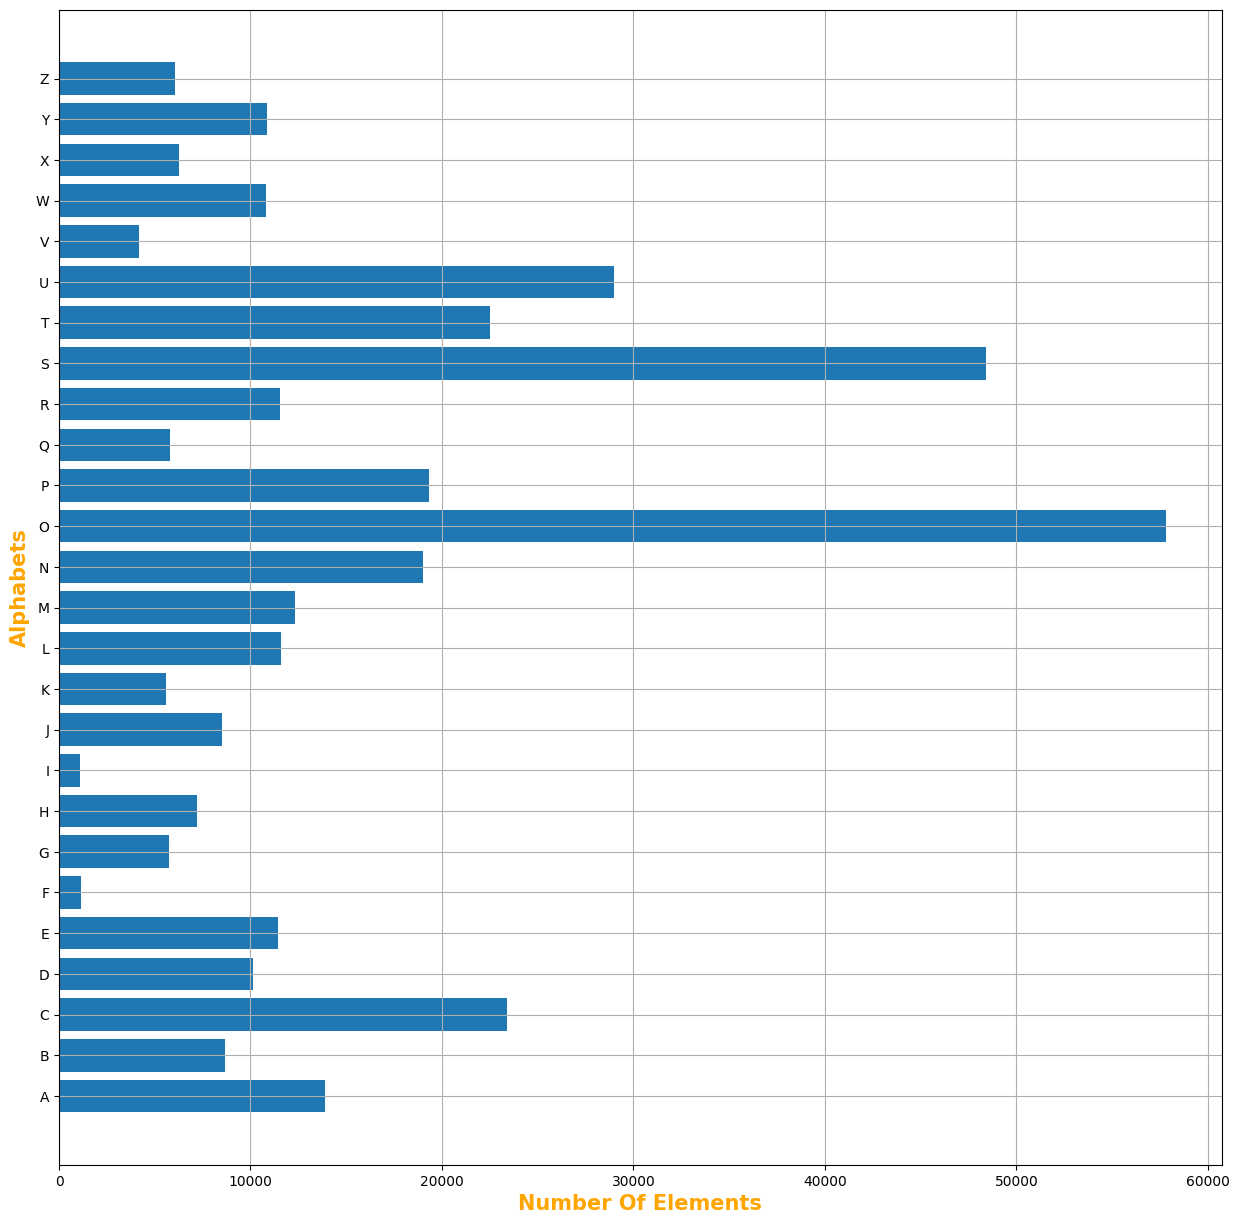

In [11]:
# Count and display the distribution of samples for each alphabet.

plt.style.use('default')

y_integer = np.int0(y)
count = np.zeros(26, dtype='int')

for i in y_integer:
    count[i] += 1

alphabets = []

for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.barh(alphabets, count)

plt.xlabel('Number Of Elements', fontsize=15, fontweight='bold', color='orange')
plt.ylabel('Alphabets', fontsize=15, fontweight='bold', color='orange')
plt.grid(True)
plt.show()

### Displaying Random Images

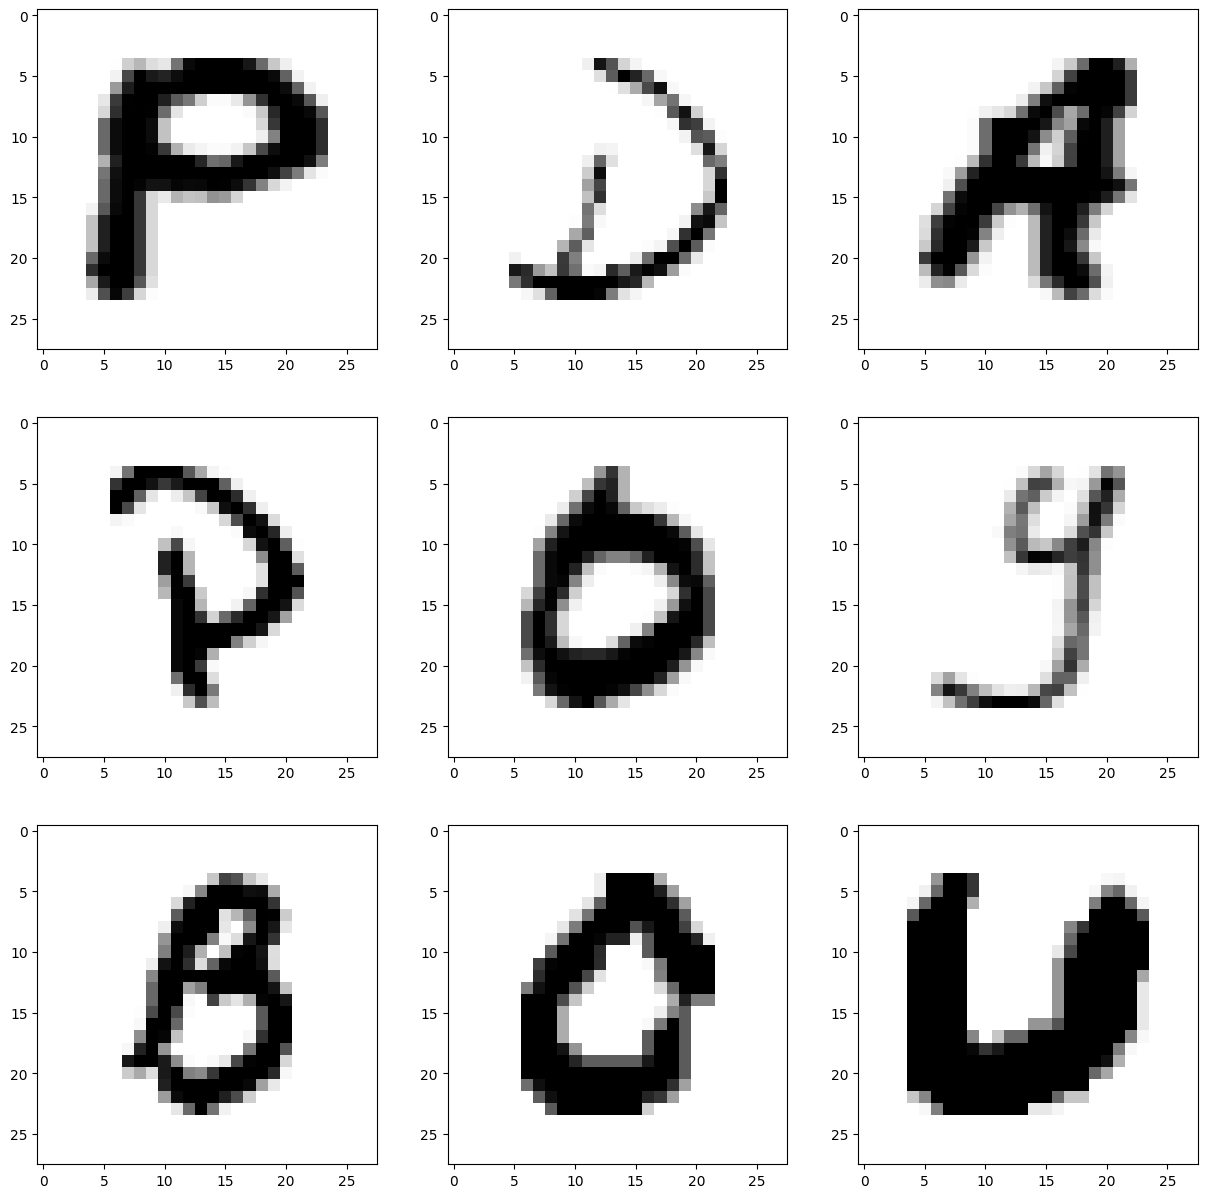

In [12]:
# Display a 3x3 grid of randomly shuffled images from x_train

plt.style.use('default')

shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i].astype(np.uint8), 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'Greys')
plt.show()

### Reshaping Images for Model Input

In [13]:
# Reshape and add a channel dimension to images to make them compatible with the CNN

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


### Converting Labels to Categorical

In [14]:
# Convert float values into categorical values through one-hot encoding

categorical_train = to_categorical(y_train, num_classes = 26)
print("New shape of train labels:", categorical_train.shape)
categorical_test = to_categorical(y_test, num_classes = 26)
print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


### Building the CNN Model

In [15]:
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

### Data Augmentation and Model Compilation

In [16]:
# Data Generator

datagen = ImageDataGenerator()
train_generator = datagen.flow(x_train, categorical_train, batch_size=32)
validation_generator = datagen.flow(x_test, categorical_test, batch_size=32)

# Compile the model

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the Model

In [17]:
# Train with generator and optimized batch size
history = my_model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 94s 9ms/step - accuracy: 0.9176 - loss: 0.3326 - val_accuracy: 0.9805 - val_loss: 0.0695
Epoch 2/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 68s 7ms/step - accuracy: 0.9799 - loss: 0.0718 - val_accuracy: 0.9827 - val_loss: 0.0619
Epoch 3/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 69s 7ms/step - accuracy: 0.9840 - loss: 0.0592 - val_accuracy: 0.9835 - val_loss: 0.0640
Epoch 4/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 75s 8ms/step - accuracy: 0.9852 - loss: 0.0545 - val_accuracy: 0.9839 - val_loss: 0.0643
Epoch 5/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 85s 8ms/step - accuracy: 0.9860 - loss: 0.0520 - val_accuracy: 0.9858 - val_loss: 0.0592


### Saving and Summarizing the Model

In [18]:
my_model.summary()

my_model.save('hecr.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,536 (1.57 MB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,358 (1.05 MB)

### Evaluating the Model

In [19]:
# Print training and validation accuracy and loss.

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9805343151092529, 0.982749342918396, 0.9834743142127991, 0.9838770031929016, 0.9857564568519592]
The training accuracy is : [0.9589206576347351, 0.9803866147994995, 0.98368239402771, 0.9849811792373657, 0.9854812622070312]
The validation loss is : [0.0694815069437027, 0.061854857951402664, 0.06397506594657898, 0.06427199393510818, 0.05924960970878601]
The training loss is : [0.1499568223953247, 0.07083030790090561, 0.0602882020175457, 0.0563751757144928, 0.05488785728812218]


### Making Predictions

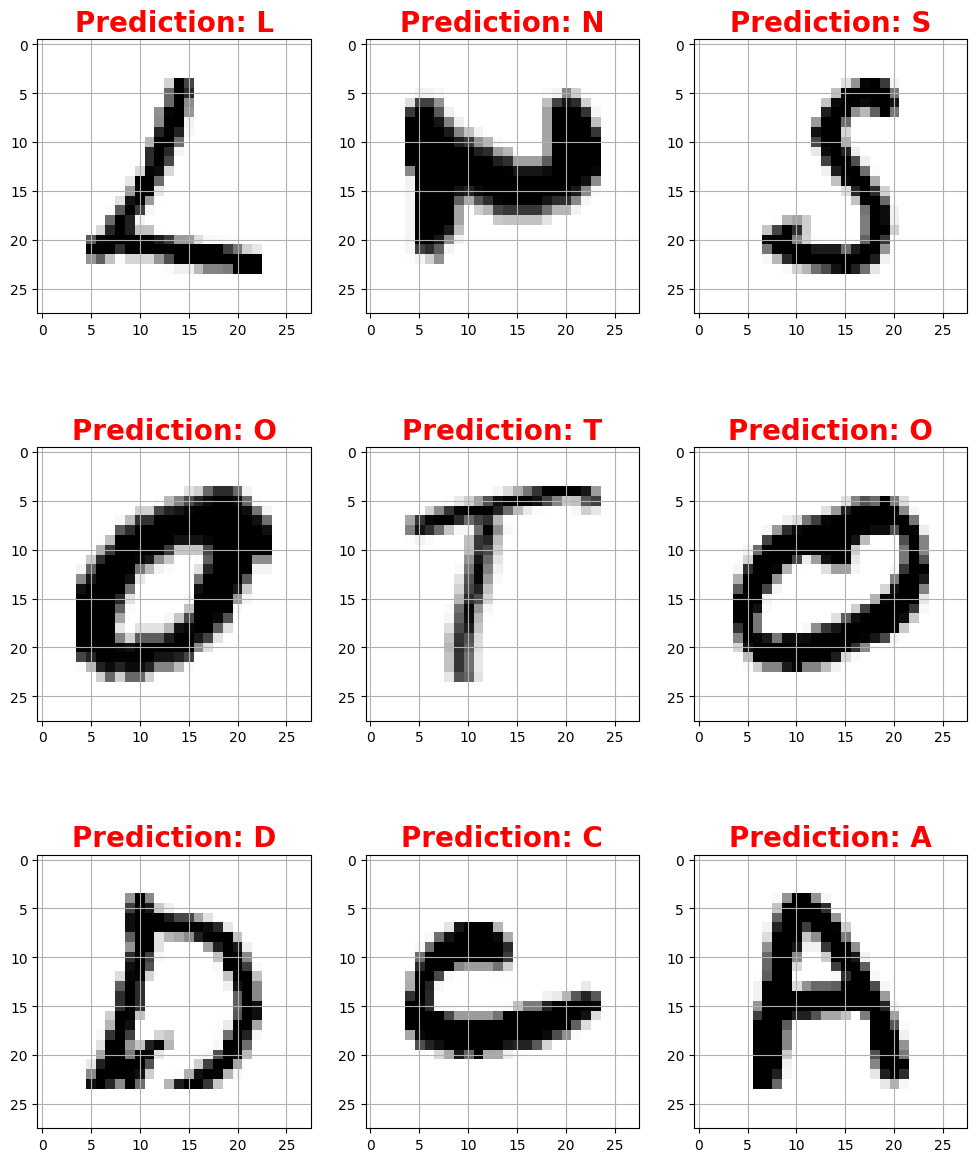

In [20]:
# Create subplots to display some of the test dataset alphabets with their predictions.

plt.style.use('default')

fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap = 'Greys')

    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    ax.grid()